Implementing the CNN visualizations described in article:
"Visualizing intermediate activation in Convolutional Neural Networks with Keras"
https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0

Dataset provided on Kaggle: (https://www.kaggle.com/cactus3/basicshapes)
 - 100 Images of Circles
 - 100 Images of Squares
 - 100 Images of Triangles



## Install Dependencies

In [1]:
#!pip install mpld3 imageio keras tensorflow h5py==2.10.0 numpy==1.19.2

In [2]:
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
import tensorflow
import h5py
import keras
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


In [3]:
print(keras.__version__)
print(tensorflow.__version__)
print(h5py.__version__)
print(np.__version__)

2.4.3
2.4.1
2.10.0
1.19.5


**Display Images of each dataset: Circles / Square / Triangles**

<ipython-input-4-ba88010a8e70>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


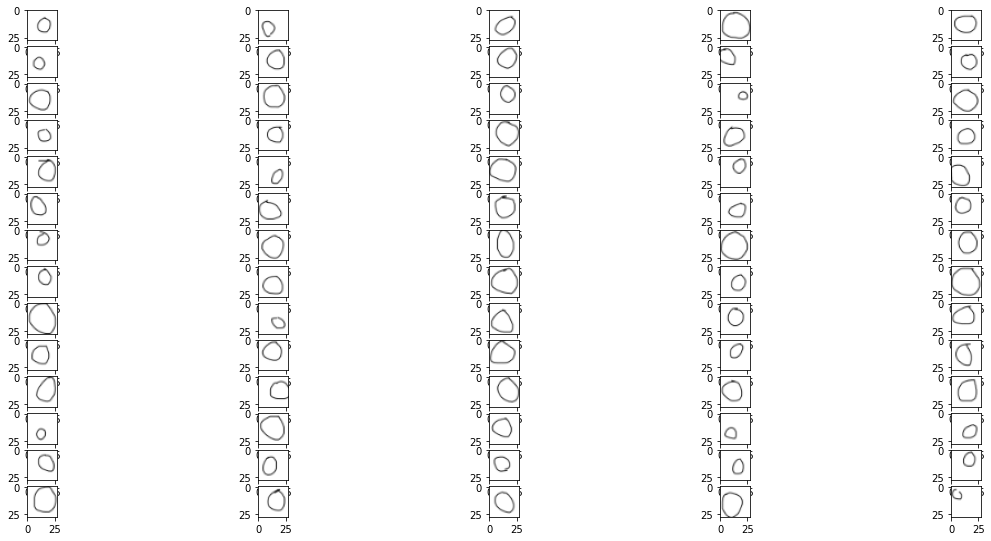

In [4]:
images = []
for img_path in glob.glob('shapes/training_set/circles/*.png'):
    images.append(mpimg.imread(img_path))
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

<ipython-input-5-4b02a4804b30>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


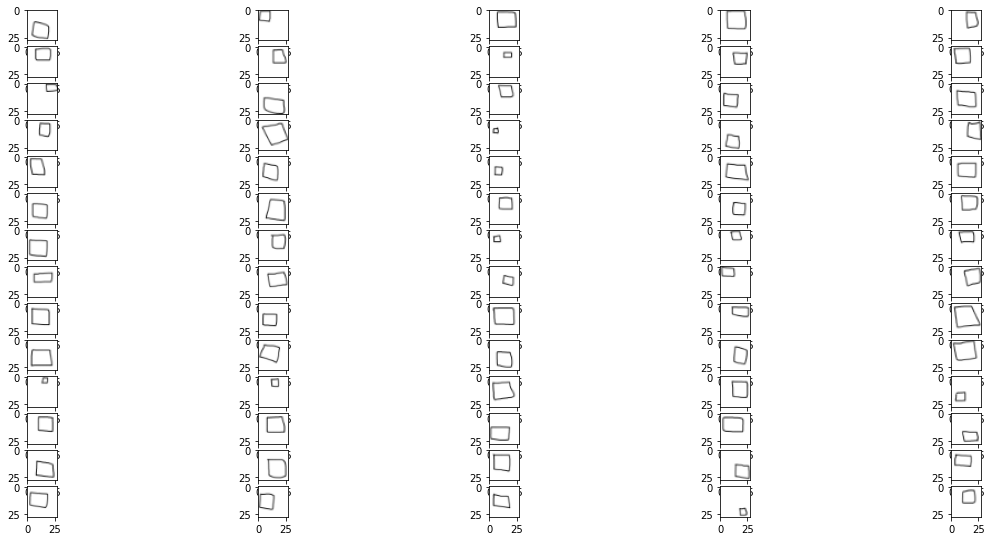

In [5]:
images = []
for img_path in glob.glob('shapes/training_set/squares/*.png'):
    images.append(mpimg.imread(img_path))
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

<ipython-input-6-7a4df53d0ef3>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


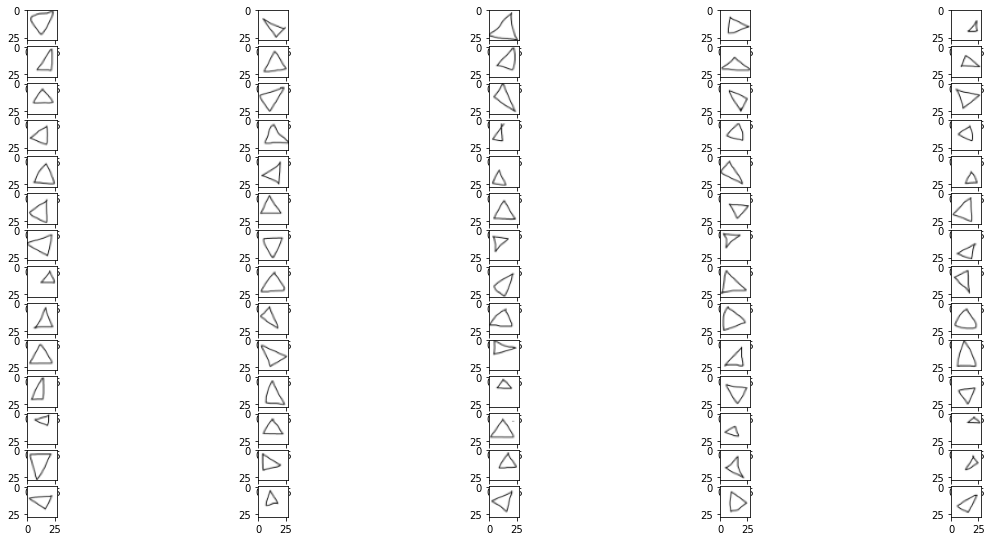

In [6]:
images = []
for img_path in glob.glob('shapes/training_set/triangles/*.png'):
    images.append(mpimg.imread(img_path))
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

## Let's build a CNN using Keras
**Conv2D:**
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
```
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)
```



In [7]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.5)) 
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

**Compile CNN**
- What are the different optimizers available for Keras???
- What are the different loss functions available for Keras???


In [8]:
# Compiling the CNN
classifier.compile(optimizer = 'rmsprop',
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])


In [9]:
# Load dataset
BATCH_SIZE = 8

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('shapes/training_set',
                                                 target_size = (28,
                                                 28),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode =
                                                     'categorical')
test_set = test_datagen.flow_from_directory('shapes/test_set',
                                            target_size = (28, 28),
                                            batch_size = 16,
                                            class_mode =
                                                 'categorical')


Found 210 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [10]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'accuracy',
                               verbose=1, 
                               save_best_only=True,
                               mode='auto')


In [11]:

TRAIN_STEPS_PER_EPOCH = np.ceil((training_set.n/BATCH_SIZE)-1)
VAL_STEPS_PER_EPOCH = np.ceil((test_set.n/BATCH_SIZE)-1)

history = classifier.fit_generator(training_set,
#                                    steps_per_epoch = 50, #TRAIN_STEPS_PER_EPOCH,
                                   epochs = 100,
                                   callbacks=[checkpointer],
                                   validation_data = test_set,
                                   validation_steps = 50) #VAL_STEPS_PER_EPOCH)


/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
27/27 [==============================] - 1s 17ms/step - loss: 1.1223 - accuracy: 0.3214 - val_loss: 1.0985 - val_accuracy: 0.3333

Epoch 00001: accuracy improved from -inf to 0.31429, saving model to best_weights.hdf5
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 1.0985 - accuracy: 0.4169

Epoch 00002: accuracy improved from 0.31429 to 0.35714, saving model to best_weights.hdf5
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 1.1053 - accuracy: 0.3875

Epoch 00003: accuracy did not improve from 0.35714
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 1.0982 - accuracy: 0.3584

Epoch 00004: accuracy did not improve from 0.35714
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 1.0986 - accuracy: 0.3728

Epoch 00005: accuracy improved from 0.35714 to 0.43333, saving model to best_weights.hdf5
Epoch 6/100
27/27 [==============================] - 0s 7ms/step - loss: 0.9305 - accura

27/27 [==============================] - 0s 6ms/step - loss: 0.0998 - accuracy: 0.9690

Epoch 00048: accuracy did not improve from 0.97143
Epoch 49/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0864 - accuracy: 0.9404

Epoch 00049: accuracy did not improve from 0.97143
Epoch 50/100
27/27 [==============================] - 0s 6ms/step - loss: 0.1588 - accuracy: 0.9603

Epoch 00050: accuracy did not improve from 0.97143
Epoch 51/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0950 - accuracy: 0.9805

Epoch 00051: accuracy did not improve from 0.97143
Epoch 52/100
27/27 [==============================] - 0s 6ms/step - loss: 0.1438 - accuracy: 0.9488

Epoch 00052: accuracy did not improve from 0.97143
Epoch 53/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0653 - accuracy: 0.9740

Epoch 00053: accuracy improved from 0.97143 to 0.97619, saving model to best_weights.hdf5
Epoch 54/100
27/27 [==============================] - 0s 6ms/s

In [12]:
classifier.load_weights('best_weights.hdf5')


In [13]:
classifier.save('shapes_cnn.h5')

**Loss / Accuracy Curves**

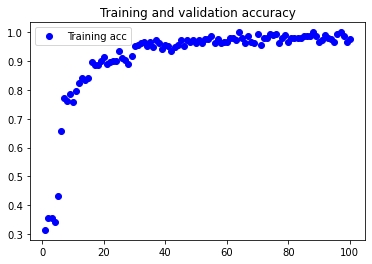

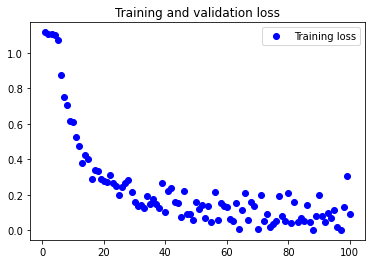

In [14]:
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## **Let's test an image against the model**

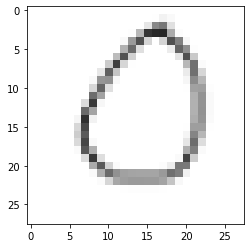

(1, 28, 28, 3)


In [15]:
from keras.preprocessing import image

img_path = 'shapes/test_set/circles/drawing(71).png'
img = image.load_img(img_path, target_size=(28, 28))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)


In [16]:
# predicting images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = classifier.predict_classes(images, batch_size=10)
print("Predicted class is:",classes)

Predicted class is: [0]


/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## **DO STUFF**

In [17]:
layer_outputs = [layer.output for layer in classifier.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input


In [18]:
activations = activation_model.predict(img_tensor) 
# Returns a list of five Numpy arrays: one array per layer activation

(1, 28, 28, 32)


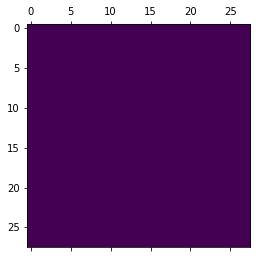

In [19]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


In [20]:
print(first_layer_activation[0, :,:,0])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0

<ipython-input-21-bcb1ccbd022c>:18: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


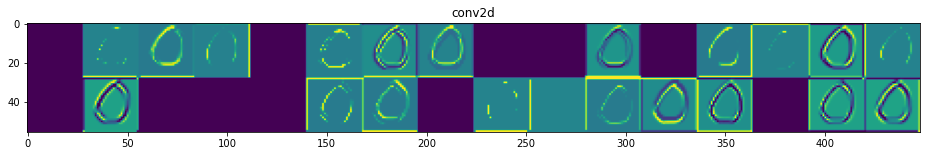

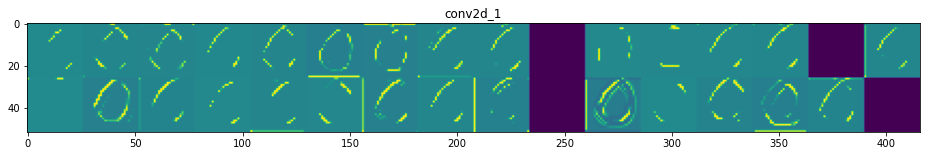

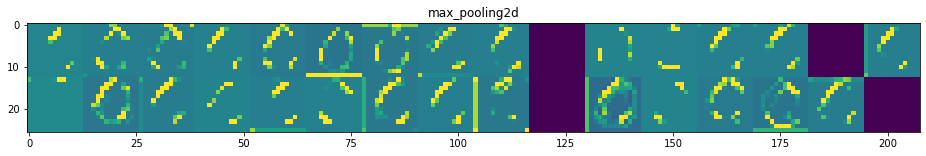

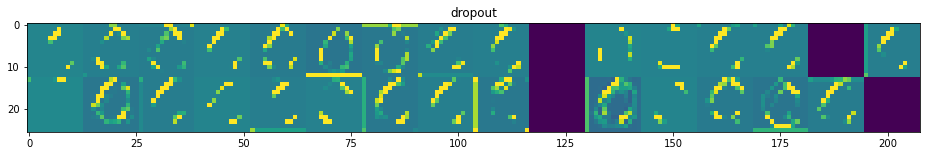

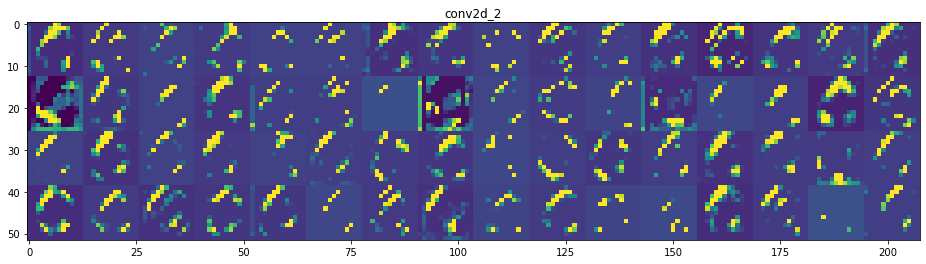

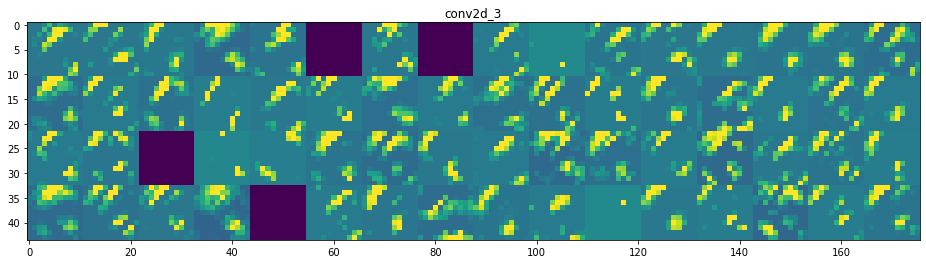

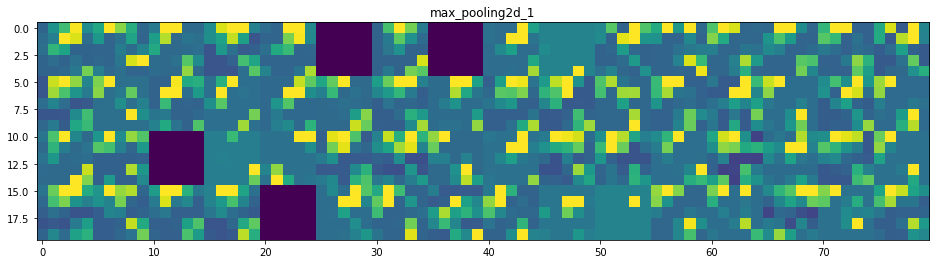

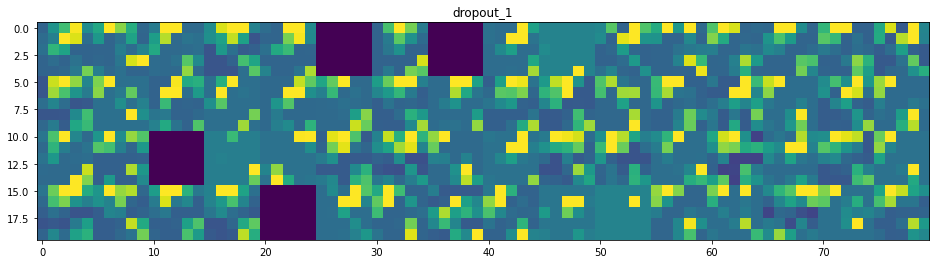

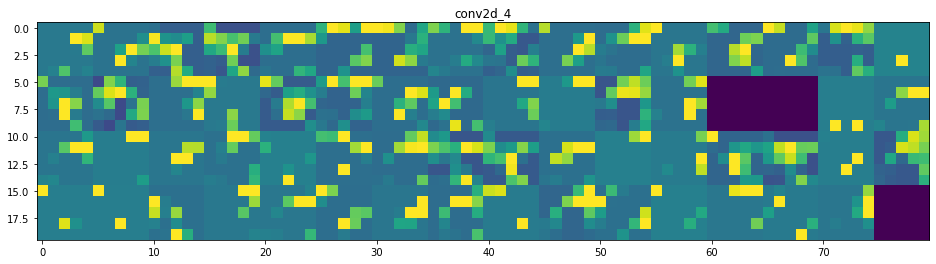

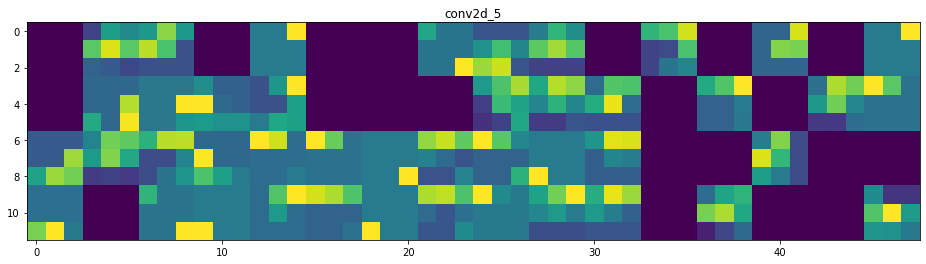

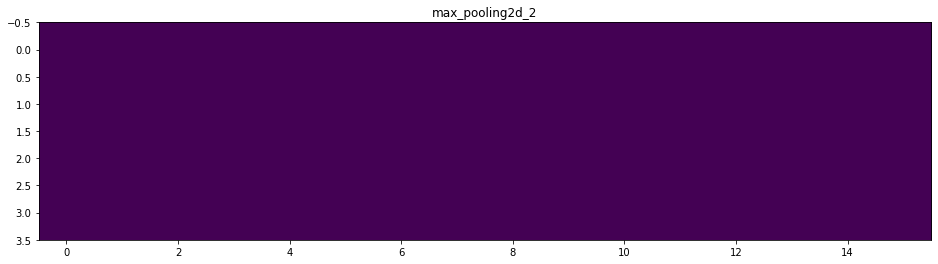

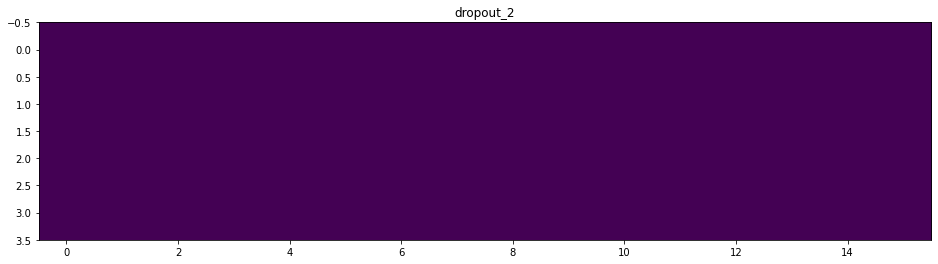

In [21]:

layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
classifier.summary()